# Red Neuronal Perceptron

En la presente libreta se desarrollará una Red Neuronal Percetrón simple, con el objetivo de comprender el funcionamiento y operación de este mecanismo, así como la programación del mismo. 

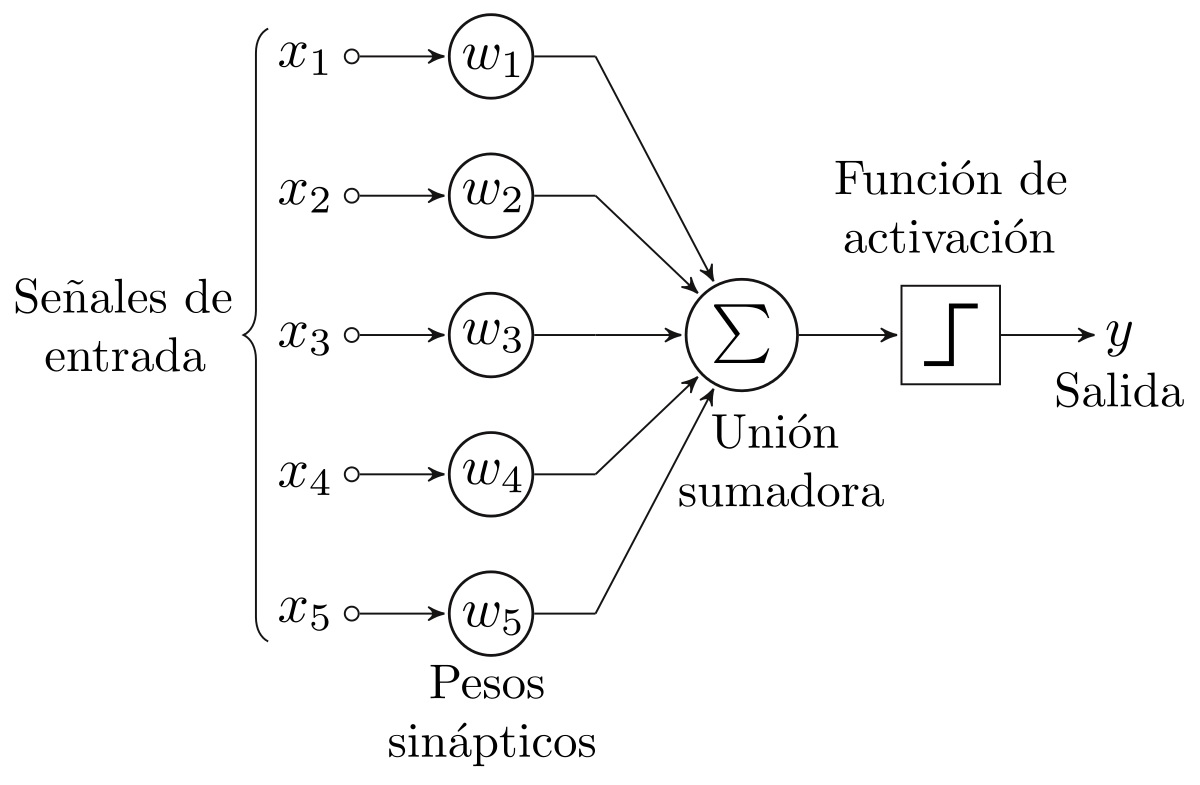

### Objetivos

Desarrollar código que contenga:
    Conjunto de puntos en un plano 2D [(X1,Y1),(X2,Y2)...(Xn,Yn)]
    La separación de este conjunto de puntos por medio de una recta y la gráfica respectiva

Crear una función perceptron que tome como argumento dicho conjunto de puntos y con base en ellos obtener los pesos óptimos de la recta que separa estos puntos.

Graficar los puntos, la línea recta esperada y la línea recta obtenida por el perceptron, cada cierto número de iteraciones.

### Discusión 

1. ¿Cuál es el número óptimo de iteraciones?

2. ¿Cuántas soluciones puede encontrar el perceptron a este problema de separación binaria?

### Importamos paquetería

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

### Generamos los datos

Realizamos el dataframe de datos de números aletarios (n) de tal forma que se cumpla la condición x+y >= 1

In [2]:
n = 30        

x = np.random.uniform(-5,5,n)
y = np.random.uniform(-5,5,n)

datos = np.empty((n,4))

for i in range(n):
    datos[i][0] = 1
    datos[i][1] = x[i]
    datos[i][2] = y[i]
    
    if x[i] + y[i] >= 1 :        
        datos[i][3] = 1.0
    else :
        datos[i][3] = 0.0
    
datos

array([[ 1.        ,  0.16325774,  1.78811742,  1.        ],
       [ 1.        , -3.53141822, -2.04209329,  0.        ],
       [ 1.        ,  3.64368943,  2.37834704,  1.        ],
       [ 1.        ,  2.43440796,  1.00920853,  1.        ],
       [ 1.        , -3.7662856 ,  4.26902187,  0.        ],
       [ 1.        , -2.94922459,  4.4300408 ,  1.        ],
       [ 1.        , -1.0075195 , -0.91095647,  0.        ],
       [ 1.        , -2.55635668, -2.12377253,  0.        ],
       [ 1.        , -3.47195783, -4.86819547,  0.        ],
       [ 1.        , -0.30298552,  3.19706785,  1.        ],
       [ 1.        , -1.90706966,  0.40374681,  0.        ],
       [ 1.        , -0.73647187, -4.17603237,  0.        ],
       [ 1.        , -0.63828563,  4.0986022 ,  1.        ],
       [ 1.        ,  1.15266699, -1.73745334,  0.        ],
       [ 1.        , -1.39981396, -2.42106495,  0.        ],
       [ 1.        ,  0.4988188 ,  1.83397209,  1.        ],
       [ 1.        ,  3.

In [3]:
clase1=[[],[]]
clase2=[[],[]]

for i in range(len(datos)):
    x = datos[i][1]
    y = datos[i][2]
    z  = datos[i][-1]
    if z==1:
        clase1[0].append(x)
        clase1[1].append(y)
    else:
        clase2[0].append(x)
        clase2[1].append(y)

### Graficamos los datos

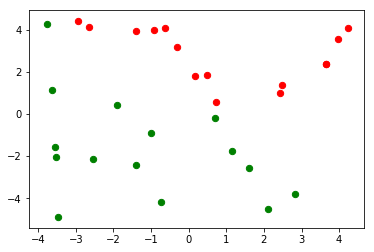

In [4]:
clase_1 = plt.scatter(clase1[0],clase1[1],s=40.0,c='r')
clase_2 = plt.scatter(clase2[0],clase2[1],s=40.0,c='g')

plt.show()

### Función de activación (Perceptron)

Se define una funcion perceptron que toma como argumento los datos de entrada (bias,x1,x2) y los pesos (w0,w1,w2)

In [5]:
def activate(inputs, weight):
    activation=0.0
    for i,w in zip(inputs,weight):
        activation += i*w 
    return 1.0 if activation>=0.0 else 0.0

### Definición del Gráfico

Se define el gráfico para visualizar la línea recta y los datos que desarrollará el perceptron

In [6]:
def line(d,w):
    clase_1 = plt.scatter(clase1[0],clase1[1],s=50.0,c='r',label='clase_1')
    clase_2 = plt.scatter(clase2[0],clase2[1],s=50.0,c='g',label='clase_2')
    plot_x = np.array([np.min(d[:, 1] - 0.2), np.max(d[:, 2]+0.2)])
    plot_y =  -1 / w[2] * (w[1] * plot_x + w[0])
    plot_y = np.reshape(plot_y, [2, -1])
    plot_y = np.squeeze(plot_y)
    plt.plot(plot_x, plot_y, color='k', linewidth=2)
    plt.xlim([-6, 6]); plt.ylim([-6, 6]);
    plt.xticks([-6.0, 0.0, -6.0]); plt.yticks([-6.0, 0.0, 6.0])
    plt.show()

### Aprendizaje del Perceptron

Se define el entramiento o función de aprendizaje del perceptron que permitirán actualizar los pesos con base en las reglas del perceptron o Función de activación

In [7]:
def training(dataset,l_rate,n_epoch):
    weights = [np.random.uniform(0, 1) for i in range(len(dataset[0]))]  # pesos inicializados aleatoriamente
    
    err = np.array([])
    itera = np.array([])

    for epoch in range(n_epoch):  # numero de iteraciones 
        sum_error = 0.0
        for i in range(len(dataset)):  
            prediction =  activate(dataset[i][:-1],weights)  
            error = dataset[i][-1] - prediction  
            sum_error += error**2
            for j in range(len(weights)):    # Actualizacion de los pesos 
                weights[j] = weights[j]+(l_rate*error*dataset[i][j])
                
        print("Iteration # ",epoch," Error = ",sum_error," W[0] ",weights[0], "W[1] ",weights[1], "W[2] ",weights[2])
        print("=====================================================================================================")
                           
        if(sum_error == 0.0): 
            break
            
        line(datos,weights) # Cada iteracion graficamos la linea recta resultante con los pesos actualizados
 
        err = np.append(err,sum_error)  # calculamos el error despues de cada iteracion (la suma al cuadrado de los errores de cada punto)
        itera = np.append(itera,epoch)
        
        # si el error total en la muestra es igual a 0 sale del loop de iteraciones 
        if(sum_error == 0.0): 
            break
    plt.plot(itera,err,'o-')
    plt.xlabel("Epoch")
    plt.ylabel("SSE")

### Iteraciones

Se corre el entrenamiento para obtener el número de iteraciones ideoneas de tal manera que los pesos (ws) de la recta sean los óptimos y reduzcan la diferencia de la predicción y el error al cuadrado a cero

Iteration #  0  Error =  2.0  W[0]  -0.036318726104562604 W[1]  0.4935185270936365 W[2]  0.5320446266810234


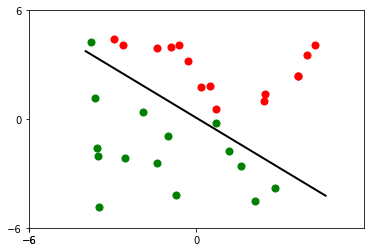

Iteration #  1  Error =  3.0  W[0]  -0.1363187261045626 W[1]  0.504843052998157 W[2]  0.5676979458785759


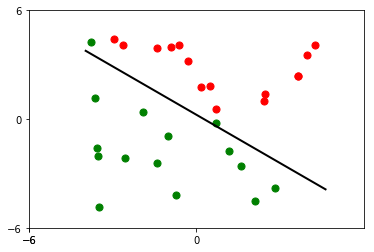

Iteration #  2  Error =  3.0  W[0]  -0.23631872610456262 W[1]  0.5161675789026775 W[2]  0.6033512650761285


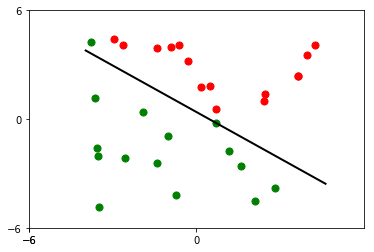

Iteration #  3  Error =  3.0  W[0]  -0.3363187261045626 W[1]  0.527492104807198 W[2]  0.639004584273681


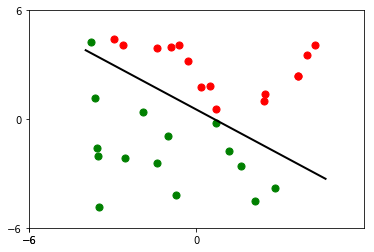

Iteration #  4  Error =  2.0  W[0]  -0.3363187261045626 W[1]  0.6091982059851262 W[2]  0.6551064771620274


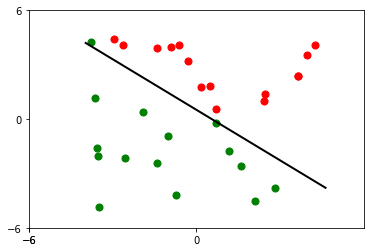

Iteration #  5  Error =  3.0  W[0]  -0.43631872610456257 W[1]  0.6205227318896466 W[2]  0.6907597963595801


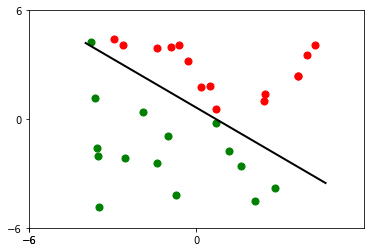

Iteration #  6  Error =  2.0  W[0]  -0.43631872610456257 W[1]  0.7022288330675748 W[2]  0.7068616892479265


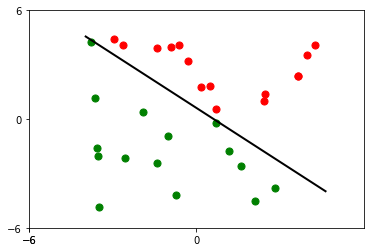

Iteration #  7  Error =  0.0  W[0]  -0.43631872610456257 W[1]  0.7022288330675748 W[2]  0.7068616892479265


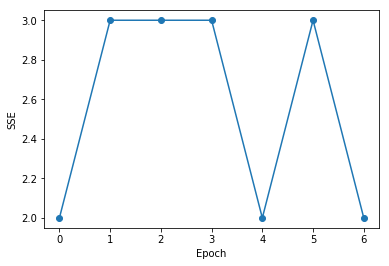

In [8]:
training(datos,0.1,20) # corremos el entrenamiento

### Retomando la Discusión

   1. ¿Cuál es el número óptimo de iteraciones?
   
   
   El número óptimo de iteraciones dependerá en gran medida de la cantidad de datos que se tengan. Entre mayor número de datos mayores iteraciones serán requeridas para que el percetron logre el aprendizaje y número de iteraciones óptimo. 

   2. ¿Cuántas soluciones puede encontrar el perceptron a este problema de separación binaria?
   
   
En este caso, como los datos son generados aleatoriamente, las soluciones podrían ser infinitas, siempre y cuando se cumpla la condición de que sea un problema de lógica AND. 
